In [23]:
import pandas as pd
import math
import numpy as np

In [24]:
%config IPCompleter.greedy = True

In [25]:
stops = pd.read_csv("./RAW_DATA/gtfs/stops.txt")
stop_times = pd.read_csv("./RAW_DATA/gtfs/stop_times.txt")

In [26]:
df = pd.merge(stop_times,stops, on='stop_id')[["trip_id", "arrival_time", "departure_time", "stop_sequence", "stop_name", "stop_lat", "stop_lon"]]

In [27]:
#df = pd.read_csv("./RAW_DATA/segments.csv")

In [28]:
df = df.sort_values(by=['trip_id','stop_sequence'])

In [29]:
df.head()

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon
1357044,1.y1003.60-38-b12-1.178.I,08:06:00,08:06:00,1,"Damastown IBM, stop 4745",53.420469,-6.419423
1358267,1.y1003.60-38-b12-1.178.I,08:06:22,08:06:22,2,"IBM Campus, stop 4989",53.419110,-6.417894
1358678,1.y1003.60-38-b12-1.178.I,08:08:04,08:08:04,3,"Damastown Road, stop 4990",53.411726,-6.422982
1359088,1.y1003.60-38-b12-1.178.I,08:08:23,08:08:23,4,"Damastown Green, stop 4991",53.411085,-6.420072
1359498,1.y1003.60-38-b12-1.178.I,08:08:39,08:08:39,5,"Damastown Ind Park, stop 4992",53.410675,-6.417620


In [30]:
df.shape

(1874919, 7)

In [31]:
df.dtypes

trip_id            object
arrival_time       object
departure_time     object
stop_sequence       int64
stop_name          object
stop_lat          float64
stop_lon          float64
dtype: object

In [32]:
datetime_columns = df[['arrival_time', 'departure_time']].columns

for column in datetime_columns:
    df[column] = pd.to_timedelta(df[column])  
    
df.dtypes

trip_id                    object
arrival_time      timedelta64[ns]
departure_time    timedelta64[ns]
stop_sequence               int64
stop_name                  object
stop_lat                  float64
stop_lon                  float64
dtype: object

In [33]:
stop_nums = []
for stop in df['stop_name']:
    try:
        num = int(stop.split(" ")[-1])
        stop_nums.append(num)
    except ValueError as e:
        print(stop, "has no number")
        stop_nums.append(np.nan)

Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland Road has no number
Cumberland

In [34]:
stop_nums

[4745,
 4989,
 4990,
 4991,
 4992,
 1719,
 1828,
 1829,
 4997,
 4998,
 4999,
 1833,
 1834,
 1835,
 1836,
 1837,
 2338,
 1840,
 1841,
 4314,
 1687,
 1688,
 1689,
 4899,
 4900,
 4746,
 1845,
 7166,
 1847,
 1696,
 1697,
 1698,
 1699,
 1700,
 1701,
 1702,
 1703,
 1905,
 1804,
 1803,
 77,
 78,
 79,
 80,
 82,
 817,
 818,
 819,
 265,
 6059,
 404,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 7370,
 7339,
 4745,
 4989,
 4990,
 4991,
 4992,
 1719,
 1828,
 1829,
 4997,
 4998,
 4999,
 1833,
 1834,
 1835,
 1836,
 1837,
 2338,
 1840,
 1841,
 4314,
 1687,
 1688,
 1689,
 4899,
 4900,
 4746,
 1845,
 7166,
 1847,
 1696,
 1697,
 1698,
 1699,
 1700,
 1701,
 1702,
 1703,
 1905,
 1804,
 1803,
 77,
 78,
 79,
 80,
 82,
 817,
 818,
 819,
 265,
 6059,
 404,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 7370,
 7339,
 7514,
 2279,
 6251,
 5140,
 1500,
 302,
 4495,
 4522,
 1934,
 2310,
 2311,
 2312,
 2313,
 2314,
 2315,
 2094,
 1406,
 1407,
 1409,
 2095,
 2096,
 2097,
 2099,
 2101,
 2102,
 2726,
 2727,
 2105,
 6140,
 6

In [35]:
df['stop_name'] = stop_nums

In [36]:
df.head()

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon
1357044,1.y1003.60-38-b12-1.178.I,08:06:00,08:06:00,1,4745.0,53.420469,-6.419423
1358267,1.y1003.60-38-b12-1.178.I,08:06:22,08:06:22,2,4989.0,53.419110,-6.417894
1358678,1.y1003.60-38-b12-1.178.I,08:08:04,08:08:04,3,4990.0,53.411726,-6.422982
1359088,1.y1003.60-38-b12-1.178.I,08:08:23,08:08:23,4,4991.0,53.411085,-6.420072
1359498,1.y1003.60-38-b12-1.178.I,08:08:39,08:08:39,5,4992.0,53.410675,-6.417620


In [37]:
df = df[df['stop_name'].notna()]

In [38]:
df.shape

(1874783, 7)

In [39]:
df['journeytime'] = df['arrival_time'].diff()

In [40]:
previous_stop = [None] + list(df["stop_name"][:len(df) - 1].values)
previous_lat = [None] + list(df["stop_lat"][:len(df) - 1].values)
previous_lon = [None] + list(df["stop_lon"][:len(df) - 1].values)

In [41]:
df["previous_stop"] = previous_stop
df["previous_lat"] = previous_lat
df["previous_lon"] = previous_lon

In [42]:
df = df.drop(list(df[['trip_id']].drop_duplicates().index))

In [43]:
df

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon,journeytime,previous_stop,previous_lat,previous_lon
1358267,1.y1003.60-38-b12-1.178.I,08:06:22,08:06:22,2,4989.0,53.419110,-6.417894,00:00:22,4745.0,53.420469,-6.419423
1358678,1.y1003.60-38-b12-1.178.I,08:08:04,08:08:04,3,4990.0,53.411726,-6.422982,00:01:42,4989.0,53.419110,-6.417894
1359088,1.y1003.60-38-b12-1.178.I,08:08:23,08:08:23,4,4991.0,53.411085,-6.420072,00:00:19,4990.0,53.411726,-6.422982
1359498,1.y1003.60-38-b12-1.178.I,08:08:39,08:08:39,5,4992.0,53.410675,-6.417620,00:00:16,4991.0,53.411085,-6.420072
1359908,1.y1003.60-38-b12-1.178.I,08:09:41,08:09:41,6,1719.0,53.408879,-6.408256,00:01:02,4992.0,53.410675,-6.417620
...,...,...,...,...,...,...,...,...,...,...,...
1835226,9999.y1009.60-9-d12-1.12.O,20:57:21,20:57:21,62,2455.0,53.311641,-6.337229,00:00:51,2454.0,53.312647,-6.332012
1835588,9999.y1009.60-9-d12-1.12.O,20:57:52,20:57:52,63,2456.0,53.310030,-6.339662,00:00:31,2455.0,53.311641,-6.337229
1835950,9999.y1009.60-9-d12-1.12.O,20:58:21,20:58:21,64,2445.0,53.308117,-6.339782,00:00:29,2456.0,53.310030,-6.339662
1836312,9999.y1009.60-9-d12-1.12.O,20:58:48,20:58:48,65,2457.0,53.307280,-6.337098,00:00:27,2445.0,53.308117,-6.339782


In [44]:
df["previous_stop"] = df["previous_stop"].astype("int64")

In [45]:
df["stop_name"] = df["stop_name"].astype("int64")

In [46]:
df

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon,journeytime,previous_stop,previous_lat,previous_lon
1358267,1.y1003.60-38-b12-1.178.I,08:06:22,08:06:22,2,4989,53.419110,-6.417894,00:00:22,4745,53.420469,-6.419423
1358678,1.y1003.60-38-b12-1.178.I,08:08:04,08:08:04,3,4990,53.411726,-6.422982,00:01:42,4989,53.419110,-6.417894
1359088,1.y1003.60-38-b12-1.178.I,08:08:23,08:08:23,4,4991,53.411085,-6.420072,00:00:19,4990,53.411726,-6.422982
1359498,1.y1003.60-38-b12-1.178.I,08:08:39,08:08:39,5,4992,53.410675,-6.417620,00:00:16,4991,53.411085,-6.420072
1359908,1.y1003.60-38-b12-1.178.I,08:09:41,08:09:41,6,1719,53.408879,-6.408256,00:01:02,4992,53.410675,-6.417620
...,...,...,...,...,...,...,...,...,...,...,...
1835226,9999.y1009.60-9-d12-1.12.O,20:57:21,20:57:21,62,2455,53.311641,-6.337229,00:00:51,2454,53.312647,-6.332012
1835588,9999.y1009.60-9-d12-1.12.O,20:57:52,20:57:52,63,2456,53.310030,-6.339662,00:00:31,2455,53.311641,-6.337229
1835950,9999.y1009.60-9-d12-1.12.O,20:58:21,20:58:21,64,2445,53.308117,-6.339782,00:00:29,2456,53.310030,-6.339662
1836312,9999.y1009.60-9-d12-1.12.O,20:58:48,20:58:48,65,2457,53.307280,-6.337098,00:00:27,2445,53.308117,-6.339782


In [47]:
df["segment"] = df["previous_stop"].astype(str) + "_" + df["stop_name"].astype(str)

In [48]:
df

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon,journeytime,previous_stop,previous_lat,previous_lon,segment
1358267,1.y1003.60-38-b12-1.178.I,08:06:22,08:06:22,2,4989,53.419110,-6.417894,00:00:22,4745,53.420469,-6.419423,4745_4989
1358678,1.y1003.60-38-b12-1.178.I,08:08:04,08:08:04,3,4990,53.411726,-6.422982,00:01:42,4989,53.419110,-6.417894,4989_4990
1359088,1.y1003.60-38-b12-1.178.I,08:08:23,08:08:23,4,4991,53.411085,-6.420072,00:00:19,4990,53.411726,-6.422982,4990_4991
1359498,1.y1003.60-38-b12-1.178.I,08:08:39,08:08:39,5,4992,53.410675,-6.417620,00:00:16,4991,53.411085,-6.420072,4991_4992
1359908,1.y1003.60-38-b12-1.178.I,08:09:41,08:09:41,6,1719,53.408879,-6.408256,00:01:02,4992,53.410675,-6.417620,4992_1719
...,...,...,...,...,...,...,...,...,...,...,...,...
1835226,9999.y1009.60-9-d12-1.12.O,20:57:21,20:57:21,62,2455,53.311641,-6.337229,00:00:51,2454,53.312647,-6.332012,2454_2455
1835588,9999.y1009.60-9-d12-1.12.O,20:57:52,20:57:52,63,2456,53.310030,-6.339662,00:00:31,2455,53.311641,-6.337229,2455_2456
1835950,9999.y1009.60-9-d12-1.12.O,20:58:21,20:58:21,64,2445,53.308117,-6.339782,00:00:29,2456,53.310030,-6.339662,2456_2445
1836312,9999.y1009.60-9-d12-1.12.O,20:58:48,20:58:48,65,2457,53.307280,-6.337098,00:00:27,2445,53.308117,-6.339782,2445_2457


In [49]:
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
import geopy.distance

distance = []
for i in range(len(df)):
    cord1 = (df["stop_lat"].iloc[i], df["stop_lon"].iloc[i])
    cord2 = (df["previous_lat"].iloc[i], df["previous_lon"].iloc[i])
    distance.append(geopy.distance.distance(cord1, cord2).km)

In [50]:
df["distance"] = distance

In [51]:
df.head()

,trip_id,arrival_time,departure_time,stop_sequence,stop_name,stop_lat,stop_lon,journeytime,previous_stop,previous_lat,previous_lon,segment,distance
1358267,1.y1003.60-38-b12-1.178.I,08:06:22,08:06:22,2,4989,53.419110,-6.417894,00:00:22,4745,53.420469,-6.419423,4745_4989,0.182288
1358678,1.y1003.60-38-b12-1.178.I,08:08:04,08:08:04,3,4990,53.411726,-6.422982,00:01:42,4989,53.419110,-6.417894,4989_4990,0.888657
1359088,1.y1003.60-38-b12-1.178.I,08:08:23,08:08:23,4,4991,53.411085,-6.420072,00:00:19,4990,53.411726,-6.422982,4990_4991,0.206198
1359498,1.y1003.60-38-b12-1.178.I,08:08:39,08:08:39,5,4992,53.410675,-6.417620,00:00:16,4991,53.411085,-6.420072,4991_4992,0.169300
1359908,1.y1003.60-38-b12-1.178.I,08:09:41,08:09:41,6,1719,53.408879,-6.408256,00:01:02,4992,53.410675,-6.417620,4992_1719,0.654035


In [52]:
dropped = ["trip_id","arrival_time","departure_time","stop_sequence","stop_name","stop_lat","stop_lon", "previous_stop" ,"previous_lat","previous_lon"]

In [53]:
df = df.drop(columns=dropped)

In [54]:
df = df.drop_duplicates()

In [55]:
df["journeytime"] = df["journeytime"].astype("int64")

In [56]:
df

,journeytime,segment,distance
1358267,22000000000,4745_4989,0.182288
1358678,102000000000,4989_4990,0.888657
1359088,19000000000,4990_4991,0.206198
1359498,16000000000,4991_4992,0.169300
1359908,62000000000,4992_1719,0.654035
...,...,...,...
1222733,18000000000,1267_1268,0.189447
1223185,31000000000,1268_1269,0.322274
1223637,19000000000,1269_1265,0.201805
856713,57000000000,1265_6115,0.480839


In [57]:
X = df[["distance", "journeytime"]]
y = df["segment"]

In [58]:
from sklearn.cluster import KMeans
import numpy as np

In [59]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [60]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 25)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

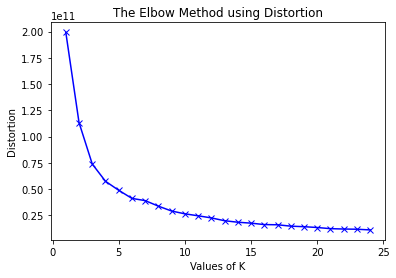

In [82]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [83]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [84]:
result = X.copy()
result["category"] = list(kmeans.labels_)

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns

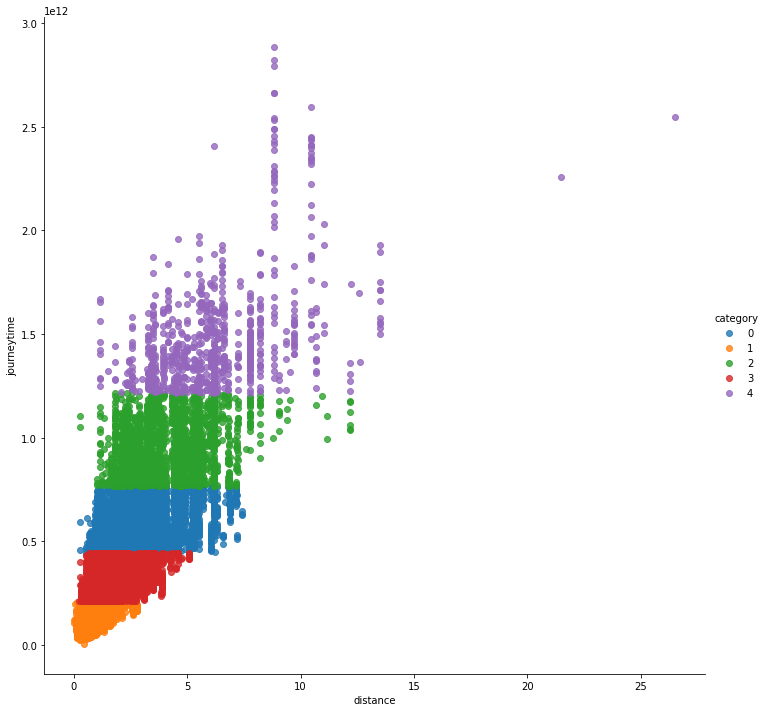

In [86]:
sns.lmplot(x='distance', y='journeytime', data=result, hue='category', fit_reg=False,height=10)

In [87]:
result["segment"] = y

In [88]:
segment_categories = result[["segment","category"]].set_index('segment').to_dict()['category']

In [89]:
#https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict
import pickle

with open('segment_categories.pickle', 'wb') as handle:
    pickle.dump(segment_categories, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [62]:
df["distance"] = df["distance"].transform(lambda x: abs(x))

In [63]:
distances = df[["segment","distance"]].set_index('segment').to_dict()["distance"]

In [64]:
distances

{'4745_4989': 0.18228810539986107,
 '4989_4990': 0.8886572041295223,
 '4990_4991': 0.20619848736270907,
 '4991_4992': 0.16930016565026593,
 '4992_1719': 0.6540352614650484,
 '1719_1828': 0.7121230797374738,
 '1828_1829': 0.19946986613812215,
 '1829_4997': 0.2851868018517216,
 '4997_4998': 0.23472825489794458,
 '4998_4999': 0.3359074177989021,
 '4999_1833': 0.24182121169844958,
 '1833_1834': 0.32689155241429907,
 '1834_1835': 0.2579727420913475,
 '1835_1836': 0.33029978422307543,
 '1836_1837': 0.34025494724292005,
 '1837_2338': 0.3608595639706634,
 '2338_1840': 0.576660909189523,
 '1840_1841': 0.3234714117702961,
 '1841_4314': 0.33078839179335956,
 '4314_1687': 0.5791130456765663,
 '1687_1688': 0.43547476368038684,
 '1688_1689': 0.4389649854740846,
 '1689_4899': 0.19334821498998267,
 '4899_4900': 0.4131881925834005,
 '4900_4746': 0.37923565578160645,
 '4746_1845': 0.39856182882833535,
 '1845_7166': 0.5087126466224545,
 '7166_1847': 0.916926884816155,
 '1847_1696': 0.3117797335381255,
 '

In [65]:
#https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict
import pickle

with open('distances.pickle', 'wb') as handle:
    pickle.dump(distances, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
journeytime = df[["segment","journeytime"]].set_index('segment').to_dict()["journeytime"]

In [67]:
#https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict
import pickle

with open('journeytimes.pickle', 'wb') as handle:
    pickle.dump(journeytime, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [68]:
journeytime

{'4745_4989': 17000000000,
 '4989_4990': 107000000000,
 '4990_4991': 27000000000,
 '4991_4992': 20000000000,
 '4992_1719': 66000000000,
 '1719_1828': 60000000000,
 '1828_1829': 24000000000,
 '1829_4997': 32000000000,
 '4997_4998': 27000000000,
 '4998_4999': 41000000000,
 '4999_1833': 29000000000,
 '1833_1834': 47000000000,
 '1834_1835': 30000000000,
 '1835_1836': 36000000000,
 '1836_1837': 46000000000,
 '1837_2338': 64000000000,
 '2338_1840': 126000000000,
 '1840_1841': 31000000000,
 '1841_4314': 64000000000,
 '4314_1687': 72000000000,
 '1687_1688': 62000000000,
 '1688_1689': 102000000000,
 '1689_4899': 28000000000,
 '4899_4900': 53000000000,
 '4900_4746': 61000000000,
 '4746_1845': 58000000000,
 '1845_7166': 85000000000,
 '7166_1847': 55000000000,
 '1847_1696': 64000000000,
 '1696_1697': 25000000000,
 '1697_1698': 46000000000,
 '1698_1699': 30000000000,
 '1699_1700': 47000000000,
 '1700_1701': 57000000000,
 '1701_1702': 40000000000,
 '1702_1703': 40000000000,
 '1703_1905': 27000000000